### Full Name : Fateme Raeijian
### Student Number : 402203389
___

## P1: Introduction (5 points)
The dataset comprises various independent variables serving as predictors for loan results and one dependent variable, "Loan_Status." The independent variables include Gender, Marital status, Dependents, and so on. Initially, we conduct data exploration to understand the dataset better. Then, we do some data preprocessing to ready the data for the regression model. Finally, we train a regression model to predict the outcome.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The cell below will download the dataset.

In [3]:
!gdown 1sG5yPXWK7a6wFlsVc2XCjNkwCxdcsstM

Downloading...
From: https://drive.google.com/uc?id=1sG5yPXWK7a6wFlsVc2XCjNkwCxdcsstM
To: /content/Loan_Data.csv
100% 38.0k/38.0k [00:00<00:00, 59.4MB/s]


:TODO: Load the dataset as a dataframe. Check for duplicate rows and if there are any, delete them. Display the first 10 rows. (5 points)

In [4]:
df = pd.read_csv('Loan_Data.csv')
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    df = df.drop_duplicates()

print(df.head(10))

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000         

## P2: Data Exploration (18 points)
In this section, we perform some data exploration to get a better understanding of the data.

TODO: Display the count of each unique value in the 'property_area' column. (3 points)

In [5]:
property_area_counts = df['Property_Area'].value_counts()
print(property_area_counts)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


TODO: Plot the correlation between different features. (use sns.heatmap) (3 points)

<ipython-input-6-8d3e033d6f5b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


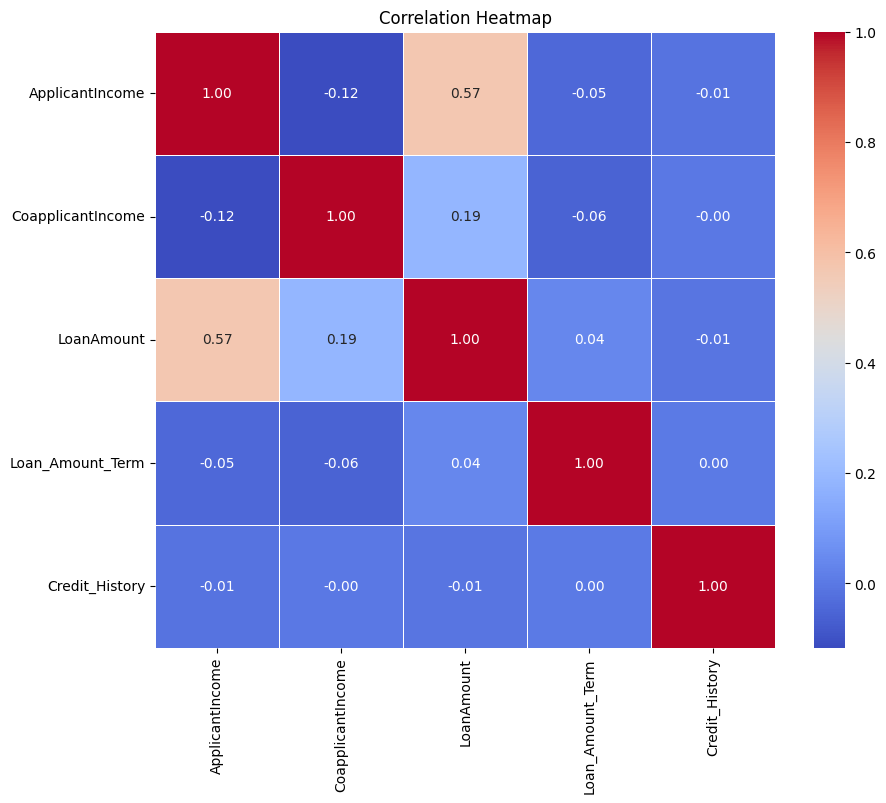

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

TODO: Plot a bar chart combining the 'Gender' and 'Loan_Status' columns (hint: use crosstab in pandas). Additionally, plot count plots for the 'Married' and 'Self_Employed' columns. (3 points)

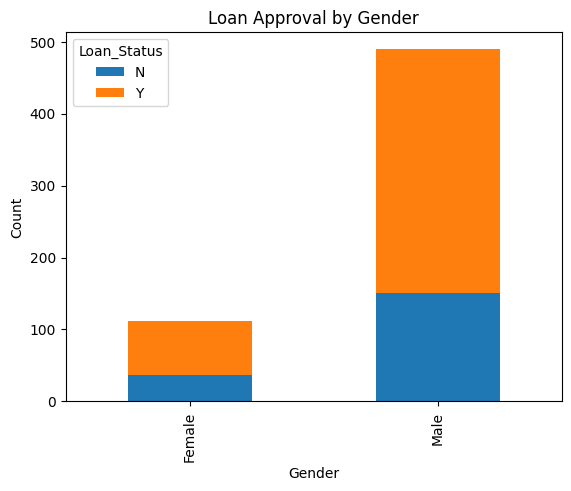

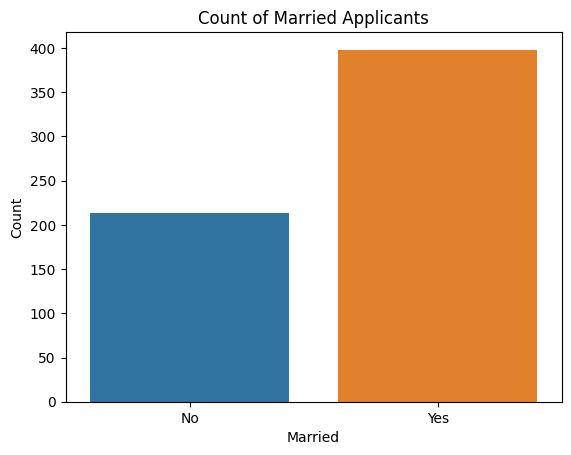

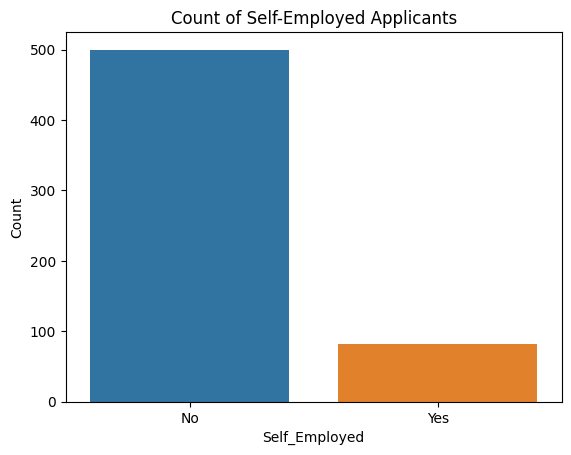

In [7]:
gender_loan = pd.crosstab(df['Gender'], df['Loan_Status'])

# Plot the bar chart
gender_loan.plot(kind='bar', stacked=True)
plt.title('Loan Approval by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Plot the countplot for 'Married'
plt.figure()
sns.countplot(data=df, x='Married')
plt.title('Count of Married Applicants')
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()

# Plot the countplot for 'Self_Employed'
plt.figure()
sns.countplot(data=df, x='Self_Employed')
plt.title('Count of Self-Employed Applicants')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.show()

TODO: Plot a pie chart for the 'Education' column. (3 points)

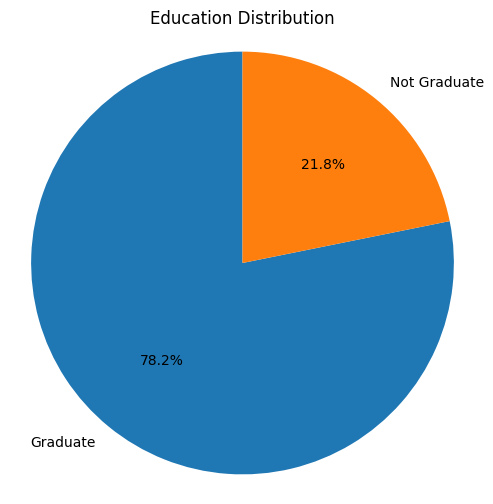

In [8]:
education_counts = df['Education'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Education Distribution')
plt.axis('equal')
plt.show()

TODO: Plot a box plot for the combination of 'Loan_Status' and 'ApplicantIncome' columns. (3 points)

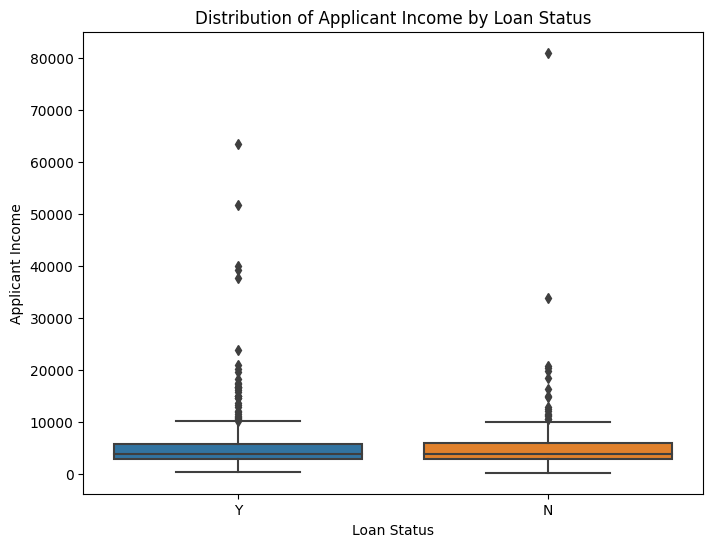

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Loan_Status', y='ApplicantIncome')
plt.title('Distribution of Applicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

TODO: Plot a histogram of the 'ApplicantIncome' column with 10 bins. (3 points)

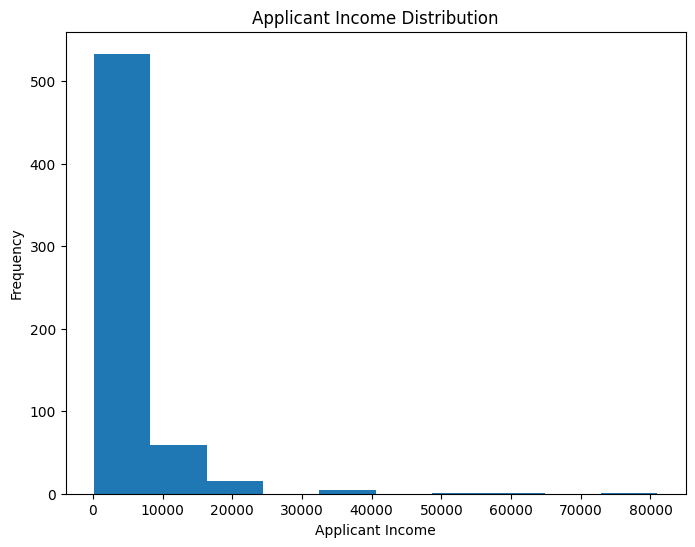

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(df['ApplicantIncome'], bins=10)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

## P3: Pre-processing (20 points)
In this section, we perform some pre-processing to make the data ready for the model.

TODO: Check for any null value. (2 point)

In [11]:
null_values = df.isnull().sum()
print(null_values)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


TODO: As you can observe, there are some null values. Given the significance of credit history for loan status prediction, we cannot impute null values for this specific column. Therefore, delete all rows containing null values in the 'credit history' column. For other columns, fill null entries with the mode for non-float/int columns and with the mean for float/int columns. (8 points)

In [12]:
df = df.dropna(subset=['Credit_History'])

for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    elif np.issubdtype(df[column].dtype, np.number):
        df[column].fillna(df[column].mean(), inplace=True)

<ipython-input-12-bc257d3938a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-12-bc257d3938a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-12-bc257d3938a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-12-bc257d3938a4>:5:

TODO: There are some columns that are entirely independent of our dependent variable, such as Loan_ID. Please drop this column. (2 points)

In [13]:
df = df.drop('Loan_ID', axis=1)

TODO: Separate the data into independent variables and the target variable. (1 point)

In [14]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

TODO: Use LabelEncoder to transform categorical variables into numeric variables. (3 points)

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

TODO: Use StandardScaler for independant variables. (3 points)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

TODO: Divide data to train and test. (1 point)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## P3: SKLearn Regression Model (10 points)

In this section, we perform logistic regression to predict the outcome.
Then we draw confusion matrix to see the accuracy of the model.

TODO: Train a logistic regression model using `sklearn` (6 points). Then use `sklearn`'s confusion matrix to check the result. (4 points)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[21 18]
 [ 1 73]]


## P4: Custom Regression Model (32 points)

TODO: Imeplement the Logistic Regression model. Complete these methods: `loss`, `loss_derivative`, `predict` and for loop of fit function. (27 points)

In [25]:
import numpy as np

class GDLogisticRegression:
    def __init__(self, n_features, max_iter=50000, lr=0.0001, tol=1e-6, momentum=0.9):
        self.N = n_features
        self.beta = np.zeros((self.N + 1,))
        self.max_iter = max_iter
        self.lr = lr
        self.tol = tol
        self.momentum = momentum

    def loss(self, X, y):
        z = np.dot(X, self.beta)
        loss = np.sum(-y * np.log(self.sigmoid(z)) - (1 - y) * np.log(1 - self.sigmoid(z)))
        return loss

    def loss_derivative(self, X, y):
        z = np.dot(X, self.beta)
        gradient = np.dot(X.T, self.sigmoid(z) - y)
        return gradient

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, X_test, threshold=0.5):
        X_test_new = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)
        y_pred = np.where(self.sigmoid(np.dot(X_test_new, self.beta)) >= threshold, 1, 0)
        return y_pred

    def fit(self, X_train, y_train):
        X_train_new = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
        last_loss = 0
        momentum = 0
        for _ in range(self.max_iter):
            gradient = self.loss_derivative(X_train_new, y_train)
            momentum = self.momentum * momentum + self.lr * gradient
            self.beta -= momentum

            current_loss = self.loss(X_train_new, y_train)
            if abs(current_loss - last_loss) <= self.tol:
                break
            last_loss = current_loss

TODO: Predict the "Outcome" for the testing samples. (5 points)

In [38]:
y_pred = logistic_model.predict(X_test)

# P5: Evaluation (15 points)

TODO: Calculate `precision`, `recall`, and `f1-score macro` using your own code. (Search what f1-score and recall are) **(each part 5 points)**

In [40]:
def precision(y_true, y_pred):
    true_positives = sum((y_true == 'Y') & (y_pred == 'Y'))
    predicted_positives = sum(y_pred == 'Y')
    return true_positives / predicted_positives

def recall(y_true, y_pred):
    true_positives = sum((y_true == 'Y') & (y_pred == 'Y'))
    actual_positives = sum(y_true == 'Y')
    return true_positives / actual_positives

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r)

# To use these functions
precision_score = precision(y_test, y_pred)
recall_score = recall(y_test, y_pred)
f1_score_macro = f1_score(y_test, y_pred)

print("Precision:", precision_score)
print("Recall:", recall_score)
print("F1-score (macro):", f1_score_macro)

Precision: 0.8021978021978022
Recall: 0.9864864864864865
F1-score (macro): 0.8848484848484848


<div dir="rtl" style="font-family: BNazanin; text-align: justify;">
precision(): نسبت تعداد مثبت‌های صحیح به مثبت‌های پیش‌بینی شده است. این معیار دقت پیش‌بینی‌های مثبت را اندازه‌گیری می‌کند.
</br>
recall(): نسبت تعداد مثبت‌های صحیح به مثبت‌های واقعی است. این معیار توانایی مدل در شناسایی نمونه‌های مثبت را اندازه‌گیری می‌کند.
</br>
f1_score(): میانگین هارمونیک precision و recall است. این معیار ارزیابی تعادل‌یافته‌ای است که precision و recall را ترکیب می‌کند.
</div>